In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold

In [4]:
path = "https://raw.githubusercontent.com/shobhit-nigam/knowledgeclan/main/datasets/admissions.csv"


In [5]:
dfa = pd.read_csv(path)

In [6]:
dfa

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894
...,...,...,...
639,1,3.381359,720.718438
640,1,3.083956,556.918021
641,1,3.114419,734.297679
642,1,3.549012,604.697503


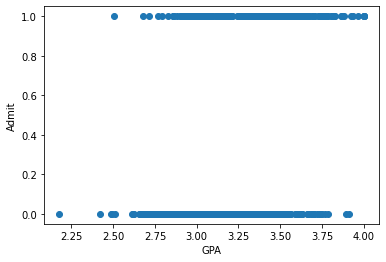

In [13]:
plt.scatter(x = dfa['gpa'], y = dfa['admit'])
plt.xlabel('GPA')
plt.ylabel('Admit')
plt.show()

In [23]:
# Logistic Regression Formula:
def  logistic(x):
    return np.exp(x) / (1+np.exp(x))

In [24]:
np.linspace(-2,2, 5)

array([-2., -1.,  0.,  1.,  2.])

In [25]:
np.linspace(1,8,11)

array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ])

In [26]:
x = np.linspace(-6,6, 50)

In [27]:
x


array([-6.        , -5.75510204, -5.51020408, -5.26530612, -5.02040816,
       -4.7755102 , -4.53061224, -4.28571429, -4.04081633, -3.79591837,
       -3.55102041, -3.30612245, -3.06122449, -2.81632653, -2.57142857,
       -2.32653061, -2.08163265, -1.83673469, -1.59183673, -1.34693878,
       -1.10204082, -0.85714286, -0.6122449 , -0.36734694, -0.12244898,
        0.12244898,  0.36734694,  0.6122449 ,  0.85714286,  1.10204082,
        1.34693878,  1.59183673,  1.83673469,  2.08163265,  2.32653061,
        2.57142857,  2.81632653,  3.06122449,  3.30612245,  3.55102041,
        3.79591837,  4.04081633,  4.28571429,  4.53061224,  4.7755102 ,
        5.02040816,  5.26530612,  5.51020408,  5.75510204,  6.        ])

In [28]:
y = logistic(x)

In [29]:
y

array([0.00247262, 0.00315659, 0.00402898, 0.00514124, 0.00655853,
       0.00836325, 0.01065923, 0.01357692, 0.01727929, 0.0219688 ,
       0.02789489, 0.03536175, 0.04473535, 0.05644827, 0.07100002,
       0.08894941, 0.11089489, 0.13743793, 0.16912564, 0.2063713 ,
       0.2493577 , 0.29793663, 0.35154728, 0.40918225, 0.46942595,
       0.53057405, 0.59081775, 0.64845272, 0.70206337, 0.7506423 ,
       0.7936287 , 0.83087436, 0.86256207, 0.88910511, 0.91105059,
       0.92899998, 0.94355173, 0.95526465, 0.96463825, 0.97210511,
       0.9780312 , 0.98272071, 0.98642308, 0.98934077, 0.99163675,
       0.99344147, 0.99485876, 0.99597102, 0.99684341, 0.99752738])

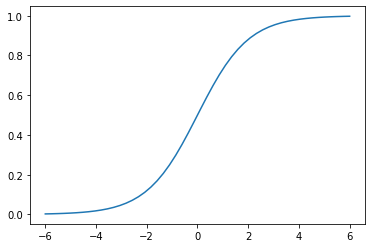

In [30]:
plt.plot(x,y)
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [33]:
linear_model = LinearRegression()
linear_model.fit(dfa[['gpa']], dfa['admit'])

LinearRegression()

In [35]:
logistic_model = LogisticRegression()
logistic_model.fit(dfa[['gpa']], dfa['admit'])

LogisticRegression()

In [37]:
pred_probs = logistic_model.predict_proba(dfa[["gpa"]])

In [38]:
pred_probs

array([[0.66343633, 0.33656367],
       [0.53967962, 0.46032038],
       [0.84160275, 0.15839725],
       ...,
       [0.69368514, 0.30631486],
       [0.46457162, 0.53542838],
       [0.47350995, 0.52649005]])

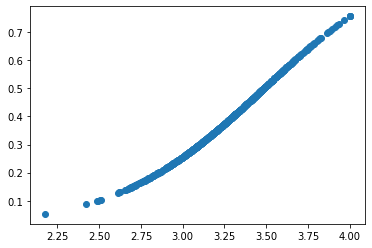

In [39]:
plt.scatter(dfa['gpa'], pred_probs[:, 1])

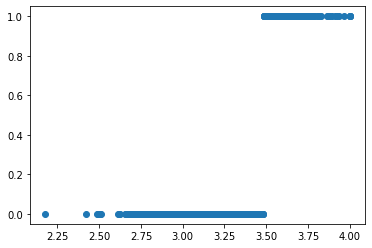

In [41]:
fitted_labels = logistic_model.predict(dfa[['gpa']])
plt.scatter(dfa['gpa'], fitted_labels)

In [42]:
dfa['predicted_label'] = fitted_labels

In [43]:
dfa['predicted_label'].value_counts()

0    507
1    137
Name: predicted_label, dtype: int64

In [44]:
dfa

,admit,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0
...,...,...,...,...
639,1,3.381359,720.718438,0
640,1,3.083956,556.918021,0
641,1,3.114419,734.297679,0
642,1,3.549012,604.697503,1
